In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df_gen = df.select_dtypes(include=['object']).copy()
df_gen.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [8]:
df_gen[df_gen.isnull().any(axis=1)]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope


In [9]:
df_gen["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [10]:
clean_nums = {"Sex": {"M": 0, "F": 1}}

In [12]:
df_gen = df_gen.replace(clean_nums)

In [13]:
df_gen.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,0,ATA,Normal,N,Up
1,1,NAP,Normal,N,Flat
2,0,ATA,ST,N,Up
3,1,ASY,Normal,Y,Flat
4,0,NAP,Normal,N,Up


In [14]:
np.random.seed(200)

k = 3

centroids = {
    i+1: [np.random.randint(0, 90), np.random.randint(0, 250)]
    for i in range(k)
}

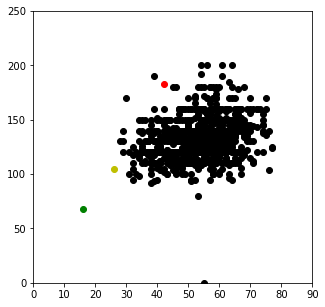

In [15]:
fig = plt.figure(figsize=(5,5))

plt.scatter(df['Age'], df['RestingBP'], color='k')
colmap = {1: 'y', 2: 'g', 3: 'r'}

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 90)
plt.ylim(0, 250)
plt.show()

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  distance_form_1  \
0              N      0.0       Up             0        37.696154   
1              N      1.0     Flat             1        59.615434   
2              N      0.0       Up             0        27.313001   
3              Y      1.5     Flat             1        39.661064   
4              N      0.0       Up             0        53.000000   

   distance_form_2  distance_form_3  closest color  
0        75.894664        43.046487        1 

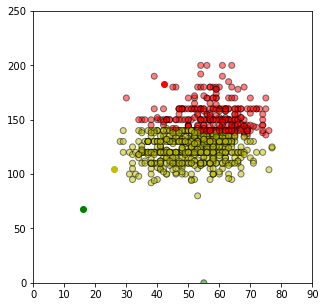

In [16]:
# assign each value to cluster
def assignment(df, centroids):
  for i in centroids.keys():
    # sqrt((x1-x2)^2 - (y1-y2)^2)
    df['distance_form_{}'.format(i)] = (
        np.sqrt(
            (df['Age'] - centroids[i][0]) ** 2 + (df['RestingBP'] - centroids[i][1]) ** 2
        )
    )

  centroid_distance_cols = ['distance_form_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_form_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 90)
plt.ylim(0, 250)
plt.show()

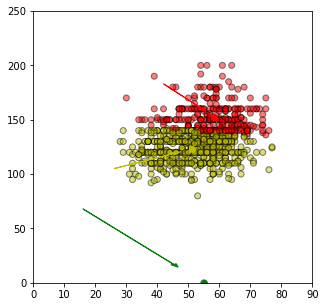

In [17]:
# update centroids
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['closest'] == i]['Age'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['RestingBP'])
  return k

centroids = update(centroids)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')

for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0, 90)
plt.ylim(0, 250)

for i in old_centroids.keys():
  old_x = old_centroids[i][0]
  old_y = old_centroids[i][1]
  dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
  dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
  ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])

plt.show()

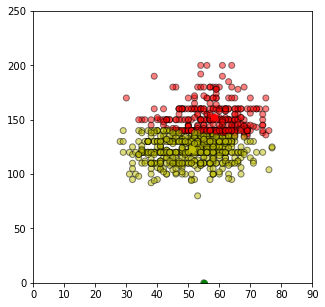

In [18]:
# repeat assignment stage
df = assignment(df, centroids)

# plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 90)
plt.ylim(0, 250)
plt.show()

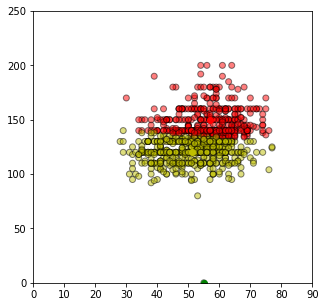

In [19]:
# continue untill all assigned categories don't change any more
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['Age'], df['RestingBP'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 90)
plt.ylim(0, 250)
plt.show()

In [20]:
column1 = df.iloc[:, 0].values
column4 = df.iloc[:, 3].values

# AgeRest = df.iloc[:, [column1, column4]].values
AgeRest = np.array([column1, column4]).T

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
# store values of x and y cordinates variables
kmeans.fit(AgeRest)

KMeans(n_clusters=3)

In [21]:
labels = kmeans.predict(AgeRest)
centroids = kmeans.cluster_centers_

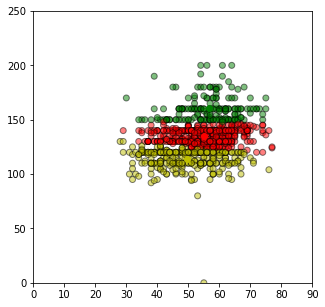

In [22]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)

# creating scatter plot and passing x and y arrays into dataframe
                              # colors also 3
plt.scatter(df['Age'], df['RestingBP'], color=colors1, alpha=0.5, edgecolor='k')

for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])

plt.xlim(0, 90)
plt.ylim(0, 250)
plt.show()

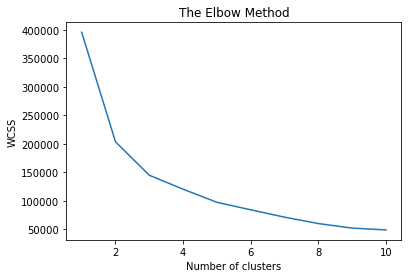

In [23]:
# do elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(AgeRest)
    wcss.append(kmeans.inertia_)

# plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)  
y_predict= kmeans.fit_predict(AgeRest)  

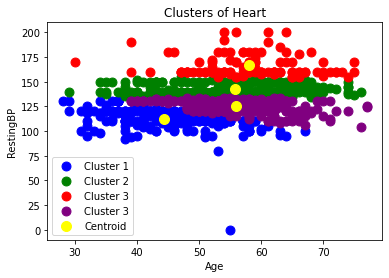

In [25]:
#visulaizing the clusters  
plt.scatter(AgeRest[y_predict == 0, 0], AgeRest[y_predict == 0, 1], s = 80, c = 'blue', label = 'Cluster 1')
plt.scatter(AgeRest[y_predict == 1, 0], AgeRest[y_predict == 1, 1], s = 80, c = 'green', label = 'Cluster 2')  
plt.scatter(AgeRest[y_predict== 2, 0], AgeRest[y_predict == 2, 1], s = 80, c = 'red', label = 'Cluster 3') 
plt.scatter(AgeRest[y_predict== 3, 0], AgeRest[y_predict == 3, 1], s = 80, c = 'purple', label = 'Cluster 3') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of Heart')  
plt.xlabel('Age')  
plt.ylabel('RestingBP')  
plt.legend()  
plt.show()  

In [26]:
features= ['Age', 'RestingBP']

C:\Users\didul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


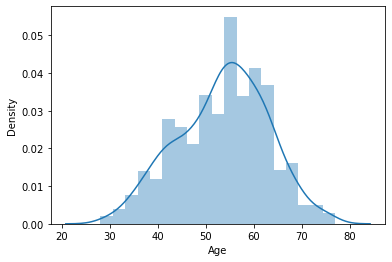

C:\Users\didul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


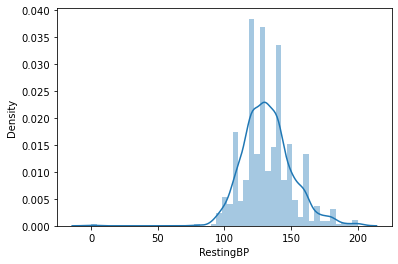

In [27]:
import seaborn as sb

for feature in features:
    sb.distplot(df[feature])
    
    plt.show()

In [28]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,distance_form_1,distance_form_2,distance_form_3,closest
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.222843,0.244599,-0.321467,0.303355
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.678307,0.999666,-0.679971,0.759006
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.010362,0.101748,-0.122057,0.060282
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.097255,0.068239,-0.034513,0.055136
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.091072,-0.106802,0.120326,-0.113305
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.149308,0.162561,-0.165258,0.195579
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.134843,0.104646,-0.089095,0.135760
distance_form_1,0.222843,0.678307,-0.010362,0.097255,-0.091072,0.149308,0.134843,1.000000,0.683832,-0.110361,0.680526
distance_form_2,0.244599,0.999666,0.101748,0.068239,-0.106802,0.162561,0.104646,0.683832,1.000000,-0.673641,0.758522
distance_form_3,-0.321467,-0.679971,-0.122057,-0.034513,0.120326,-0.165258,-0.089095,-0.110361,-0.673641,1.000000,-0.643495


C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\didul\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

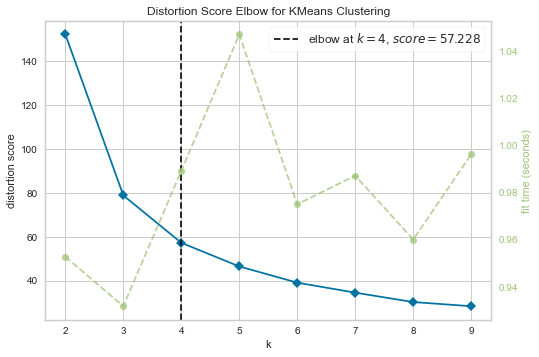

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

iris = datasets.load_iris()
X = iris.data
y = iris.target

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(X)
visualizer.show()

In [30]:
from sklearn.feature_selection import VarianceThreshold

X = df.iloc[:, [3,5]].values

v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
v_threshold.get_support()

array([ True,  True])

In [31]:
df.mad()

Age                 7.613454
RestingBP          14.104157
Cholesterol        82.437609
FastingBS           0.357545
MaxHR              20.985533
Oldpeak             0.877876
HeartDisease        0.494302
distance_form_1     9.926762
distance_form_2    14.034330
distance_form_3    10.281824
closest             0.969100
dtype: float64

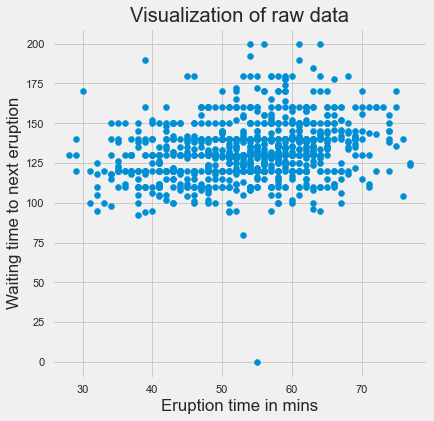

In [32]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('heart.csv')

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 3])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');